#### Home Credit Default Risk 

#### Imports

In [18]:
# We will import numpy and pandas for data munging
import pandas as pd
import numpy as np

# To encode categorical variables, we will import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# For plotting graphs
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import seaborn as sns

# To read, write and operate in a particular directory
import os

# We don't want avoid warnings and make the notebook look neat
import warnings
warnings.filterwarnings('ignore')

#### Listing Data

In [ ]:
# Listing all the filenames that were given by kaggle
print(os.listdir("./data"))

In [ ]:
# Storing data in train and test variables

In [2]:
# Training Data. Inputing into train variable
train = pd.read_csv("./data/application_train.csv") 

# Testing Data. Inputing into test variable 
test = pd.read_csv("./data/application_test.csv")

In [ ]:
# Let's checkout the first 5 rows of our dataset(train and test)

In [ ]:
print(train.shape)
train.head()

In [ ]:
print(test.shape)
test.head()

There is one less column in test data as there is no class(TARGET) variable in the dataset. There are 307511 rows in training data which 307511 loans. 

### Exploratory Data Analysis

In this stage, we will try to use graphs, statistics to understand the data, find missing values, check for any anomalies so on and so forth.

In [ ]:
# We will start with the target variable. Since this is a bi-classification supervised learning problem, 
# we should know how the two classes are divided.
train['TARGET'].value_counts()

This looks like they are not equally divided. Let us examine the ratio.

In [ ]:
ratio = train['TARGET'].value_counts()[1]/train['TARGET'].value_counts()[0]
print("Percentage of observation who made late loan payments = {0:.2f}".format(ratio*100)+" %")
print("Percentage of observation who paid loans on time  = {0:.2f}".format((1-ratio)*100)+" %")

As we can see this is a imbalanced class problem. This problem has to be carefully dealth with. Machine learning algorithms work well when we have a balanced dataset. We don't want or classifier to incorrectly classify people who paid loans on time into people who did not pay their loans on time. In statistics terminology, we would choose the model with fewer False Negatives.

In [ ]:
#plotting a histogram to visualize their difference
plt.figure(figsize = (8,6))
plt.xlabel('Target Variable')
plt.title("Histogram of unique values in target variable")
train['TARGET'].plot.hist()

### Missing Values

Next step is to deal with missing values. We will define a function which will return the percentage of missing values in each variable.

In [ ]:
#  Function that returns percentage of missing values
def missingValues(df):
    
    # returns a series with features and the total number of missing value for each feature
    sum_NAN = df.isnull().sum()  
    
    # returns a series with features and the percentage of number of missing value for each feature
    percent_NAN = sum_NAN/len(df)*100    
    
    # combining both the above into a dataframe
    df_NAN = pd.concat([sum_NAN,percent_NAN], axis = 1) 
    
    # Naming the columns
    df_NAN.columns = ['Sum of Missing Values','Percentage'] 
    
    #Sorting the values in descending order
    df_NAN = df_NAN[df_NAN.iloc[:,1] != 0].sort_values('Percentage' ,ascending = False)
    
    # We will then return a dataframe which gives us a good idea of missing values
    return df_NAN

In [ ]:
mis_val = missingValues(train)
mis_val.shape

In [ ]:
mis_val.head(30)

In [ ]:
mis_val.tail(30)

# Exploring Variables

Taking a look at the different types of variables and the unique values can provide insight into the data.  It can describe the variable whose name is not as descriptive, you can spot outliers and incorrect data, and you can get a feel of the general composition of the data.  Segmenting the different types also makes it easier to clean each type individually and compare the distributions and correlations among different variables.

In [ ]:
# Quick summary statistics
train.describe().T

## Data Dictionary

The following was taken from Ann Antonova's Kaggle kernel: 'Preliminary analysis of application dataset' (https://www.kaggle.com/aantonova/preliminary-analysis-of-application-dataset/notebook).  I cannot confirm the source of her information, but it seems reasonable.

The following variables still need explanation:
* EMERGENCYSTATE_MODE 
* FONDKAPREMONT_MODE 
* LIVINGAPARTMENTS
* NONLIVINGAPARTMENTS
* YEARS_BEGINEXPLUATATION

| Variable |                 Definition |
|:-----|:----|
| SK_ID_CURR |                 ID of loan in our sample |
| AMT_ANNUITY |                Loan annuity|
| AMT_CREDIT |                 Credit amount of the loan|
| AMT_GOODS_PRICE |            For consumer loans it is the price of the goods for which the loan is given|
| AMT_INCOME_TOTAL |     Income of the client |
| AMT_REQ_CREDIT_BUREAU_DAY |  Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application) |
| AMT_REQ_CREDIT_BUREAU_HOUR | Number of enquiries to Credit Bureau about the client one hour before application |
| AMT_REQ_CREDIT_BUREAU_MON |  Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application) |
| AMT_REQ_CREDIT_BUREAU_QRT |  Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application) |
| AMT_REQ_CREDIT_BUREAU_WEEK | Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application) |
| AMT_REQ_CREDIT_BUREAU_YEAR | Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) |
| CNT_CHILDREN |         Number of children the client has |
| CNT_FAM_MEMBERS |      How many family members does client have |
| CODE_GENDER |          Gender of the client |
| DAYS_BIRTH |                 Clients age in days at the time of application |
| DAYS_EMPLOYED |              How many days before the application the person started current employment |
| DAYS_ID_PUBLISH |            How many days before the application did client change the identity document with which he applied for the loan |
| DAYS_LAST_PHONE_CHANGE |     How many days before the application did client change phone |
| DAYS_REGISTRATION |          How many days before the application did client change his registration |
| DEF_30_CNT_SOCIAL_CIRCLE |   How many observation of clients social surroundings defaulted on 30 DPD (days past due) |
| DEF_60_CNT_SOCIAL_CIRCLE |   How many observation of clients social surroundings defaulted on 60 (days past due) DPD |
| FLAG_CONT_MOBILE  |    Was mobile phone reachable (1=YES / 0=NO) |
| FLAG_DOCUMENT_10 |    Did client provide document 10|
| FLAG_DOCUMENT_11 |    Did client provide document 11|
| FLAG_DOCUMENT_12 |    Did client provide document 12|
| FLAG_DOCUMENT_13 |    Did client provide document 13|
| FLAG_DOCUMENT_14 |    Did client provide document 14|
| FLAG_DOCUMENT_15 |    Did client provide document 15|
| FLAG_DOCUMENT_16 |    Did client provide document 16|
| FLAG_DOCUMENT_17 |    Did client provide document 17|
| FLAG_DOCUMENT_18 |    Did client provide document 18|
| FLAG_DOCUMENT_19 |    Did client provide document 19|
| FLAG_DOCUMENT_2 |     Did client provide document 2|
| FLAG_DOCUMENT_20 |    Did client provide document 20|
| FLAG_DOCUMENT_21 |    Did client provide document 21|
| FLAG_DOCUMENT_3 |     Did client provide document 3|
| FLAG_DOCUMENT_4 |     Did client provide document 4|
| FLAG_DOCUMENT_5 |     Did client provide document 5|
| FLAG_DOCUMENT_6 |     Did client provide document 6|
| FLAG_DOCUMENT_7 |     Did client provide document 7|
| FLAG_DOCUMENT_8 |     Did client provide document 8|
| FLAG_DOCUMENT_9 |     Did client provide document 9|
| FLAG_EMAIL |          Did client provide email (1=YES / 0=NO) |
| FLAG_EMP_PHONE |      Did client provide work phone (1=YES / 0=NO) |
| FLAG_MOBIL |          Did client provide mobile phone (1=YES / 0=NO) |
| FLAG_OWN_CAR |         Flag if the client owns a car |
| FLAG_OWN_REALTY |      Flag if client owns a house or flat |
| FLAG_PHONE |          Did client provide home phone (1=YES / 0=NO) |
| FLAG_WORK_PHONE  |    Did client provide home phone (1=YES / 0=NO) |
| HOUR_APPR_PROCESS_START |    Approximately at what hour did the client apply for the loan|
| LIVE_CITY_NOT_WORK_CITY |     Flag if clients contact address does not match work address (1=different / 0=same / at city level) |
| LIVE_REGION_NOT_WORK_REGION | Flag if clients contact address does not match work address (1=different / 0=same / at region level) |
| NAME_CONTRACT_TYPE |         Identification if loan is cash or revolving|
| NAME_EDUCATION_TYPE |  Level of highest education the client achieved |
| NAME_FAMILY_STATUS |   Family status of the client |
| NAME_HOUSING_TYPE |    What is the housing situation of the client (renting / living with parents / ...) |
| NAME_INCOME_TYPE |     Clients income type (businessman / working / maternity leave /…) |
| NAME_TYPE_SUITE |            Who was accompanying client when he was applying for the loan|
| OBS_30_CNT_SOCIAL_CIRCLE |   How many observation of clients social surroundings with observable 30 DPD (days past due) default |
| OBS_60_CNT_SOCIAL_CIRCLE |   How many observation of clients social surroundings with observable 60 DPD (days past due) default |
| OCCUPATION_TYPE |      What kind of occupation does the client have |
| ORGANIZATION_TYPE |    Type of organization where client works |
| OWN_CAR_AGE |          Age of clients car |
| REG_CITY_NOT_LIVE_CITY |      Flag if clients permanent address does not match contact address (1=different / 0=same / at city level) |
| REG_CITY_NOT_WORK_CITY |      Flag if clients permanent address does not match work address (1=different / 0=same / at city level) |
| REG_REGION_NOT_LIVE_REGION |  Flag if clients permanent address does not match contact address (1=different / 0=same / at region level) |
| REG_REGION_NOT_WORK_REGION |  Flag if clients permanent address does not match work address (1=different / 0=same / at region level) |
| REGION_POPULATION_RELATIVE |  Normalized population of region where client lives (higher number means the client lives in more populated region) |
| REGION_RATING_CLIENT |        Our rating of the region where client lives (1 /2 /3) |
| REGION_RATING_CLIENT_W_CITY | Our rating of the region where client lives with taking city into account (1 /2 /3) |
| WEEKDAY_APPR_PROCESS_START | On which day of the week did the client apply for the loan|

### Summary Variables

| Summary Variables |                 Definition |
|:-----|:----|
| APARTMENTS_AVG/_MEDI/_MODE | apartment size|
| BASEMENTAREA_AVG/_MEDI/_MODE | basement size|
| COMMONAREA_AVG/_MEDI/_MODE | common area size|
| ELEVATORS_AVG/_MEDI/_MODE | number of elevators in building|
| ENTRANCES_AVG/_MEDI/_MODE | number of entrances in building|
| FLOORSMAX_AVG/_MEDI/_MODE | Maximum number of floors (in structure or that customer owns?) |
| FLOORSMIN_AVG/_MEDI/_MODE | Minimum number of floors|
| HOUSETYPE_MODE | type of house that lendee most often lives at|
| LANDAREA_AVG/_MEDI/_MODE | size of land|
| LIVINGAREA_AVG/_MEDI/_MODE | size of living area|
| NONLIVINGAREA_AVG/_MEDI/_MODE | size of lawn/porch/etc|
| TOTALAREA_MODE | total property size|
| WALLSMATERIAL_MODE | material of walls|
| YEARS_BUILD_AVG/_MEDI/_MODE | building age|

## Binary Variables

These variables are categorical, but much easier to deal with since there are only two choices.  That means we don't need to do any one hot encoding and and can easily replace the string values with 1 and 0

In [9]:
# Any variable that starts with "Flag"
flag_cols = [col for col in train if col.startswith('FLAG')]

# Any location based variable, except those that are rating based
location_cols = ['REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                 'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_WORK_REGION']

# Put everything into one dataframe
bi_df = train[flag_cols + location_cols]

In [10]:
# Make sure that these are actually binary variables, and determine which variables we need to replace
for col in bi_df.columns:
    print(col, bi_df[col].unique())

FLAG_OWN_CAR ['N' 'Y']
FLAG_OWN_REALTY ['Y' 'N']
FLAG_MOBIL [1 0]
FLAG_EMP_PHONE [1 0]
FLAG_WORK_PHONE [0 1]
FLAG_CONT_MOBILE [1 0]
FLAG_PHONE [1 0]
FLAG_EMAIL [0 1]
FLAG_DOCUMENT_2 [0 1]
FLAG_DOCUMENT_3 [1 0]
FLAG_DOCUMENT_4 [0 1]
FLAG_DOCUMENT_5 [0 1]
FLAG_DOCUMENT_6 [0 1]
FLAG_DOCUMENT_7 [0 1]
FLAG_DOCUMENT_8 [0 1]
FLAG_DOCUMENT_9 [0 1]
FLAG_DOCUMENT_10 [0 1]
FLAG_DOCUMENT_11 [0 1]
FLAG_DOCUMENT_12 [0 1]
FLAG_DOCUMENT_13 [0 1]
FLAG_DOCUMENT_14 [0 1]
FLAG_DOCUMENT_15 [0 1]
FLAG_DOCUMENT_16 [0 1]
FLAG_DOCUMENT_17 [0 1]
FLAG_DOCUMENT_18 [0 1]
FLAG_DOCUMENT_19 [0 1]
FLAG_DOCUMENT_20 [0 1]
FLAG_DOCUMENT_21 [0 1]
REG_REGION_NOT_LIVE_REGION [0 1]
LIVE_REGION_NOT_WORK_REGION [0 1]
REG_CITY_NOT_LIVE_CITY [0 1]
REG_CITY_NOT_WORK_CITY [0 1]
LIVE_CITY_NOT_WORK_CITY [0 1]
REG_REGION_NOT_WORK_REGION [0 1]


In [11]:
# Replace the Y/N with 1 and 0
bi_df.FLAG_OWN_CAR = pd.get_dummies(bi_df.FLAG_OWN_CAR)['Y'].astype('int64')
bi_df.FLAG_OWN_REALTY = pd.get_dummies(bi_df.FLAG_OWN_REALTY)['Y'].astype('int64')

In [15]:
# Changing all binary vairables from integer to categorical
for col in bi_df:
    bi_df[col] = bi_df[col].astype('category')

### Visualizing Binary Variable Distribution

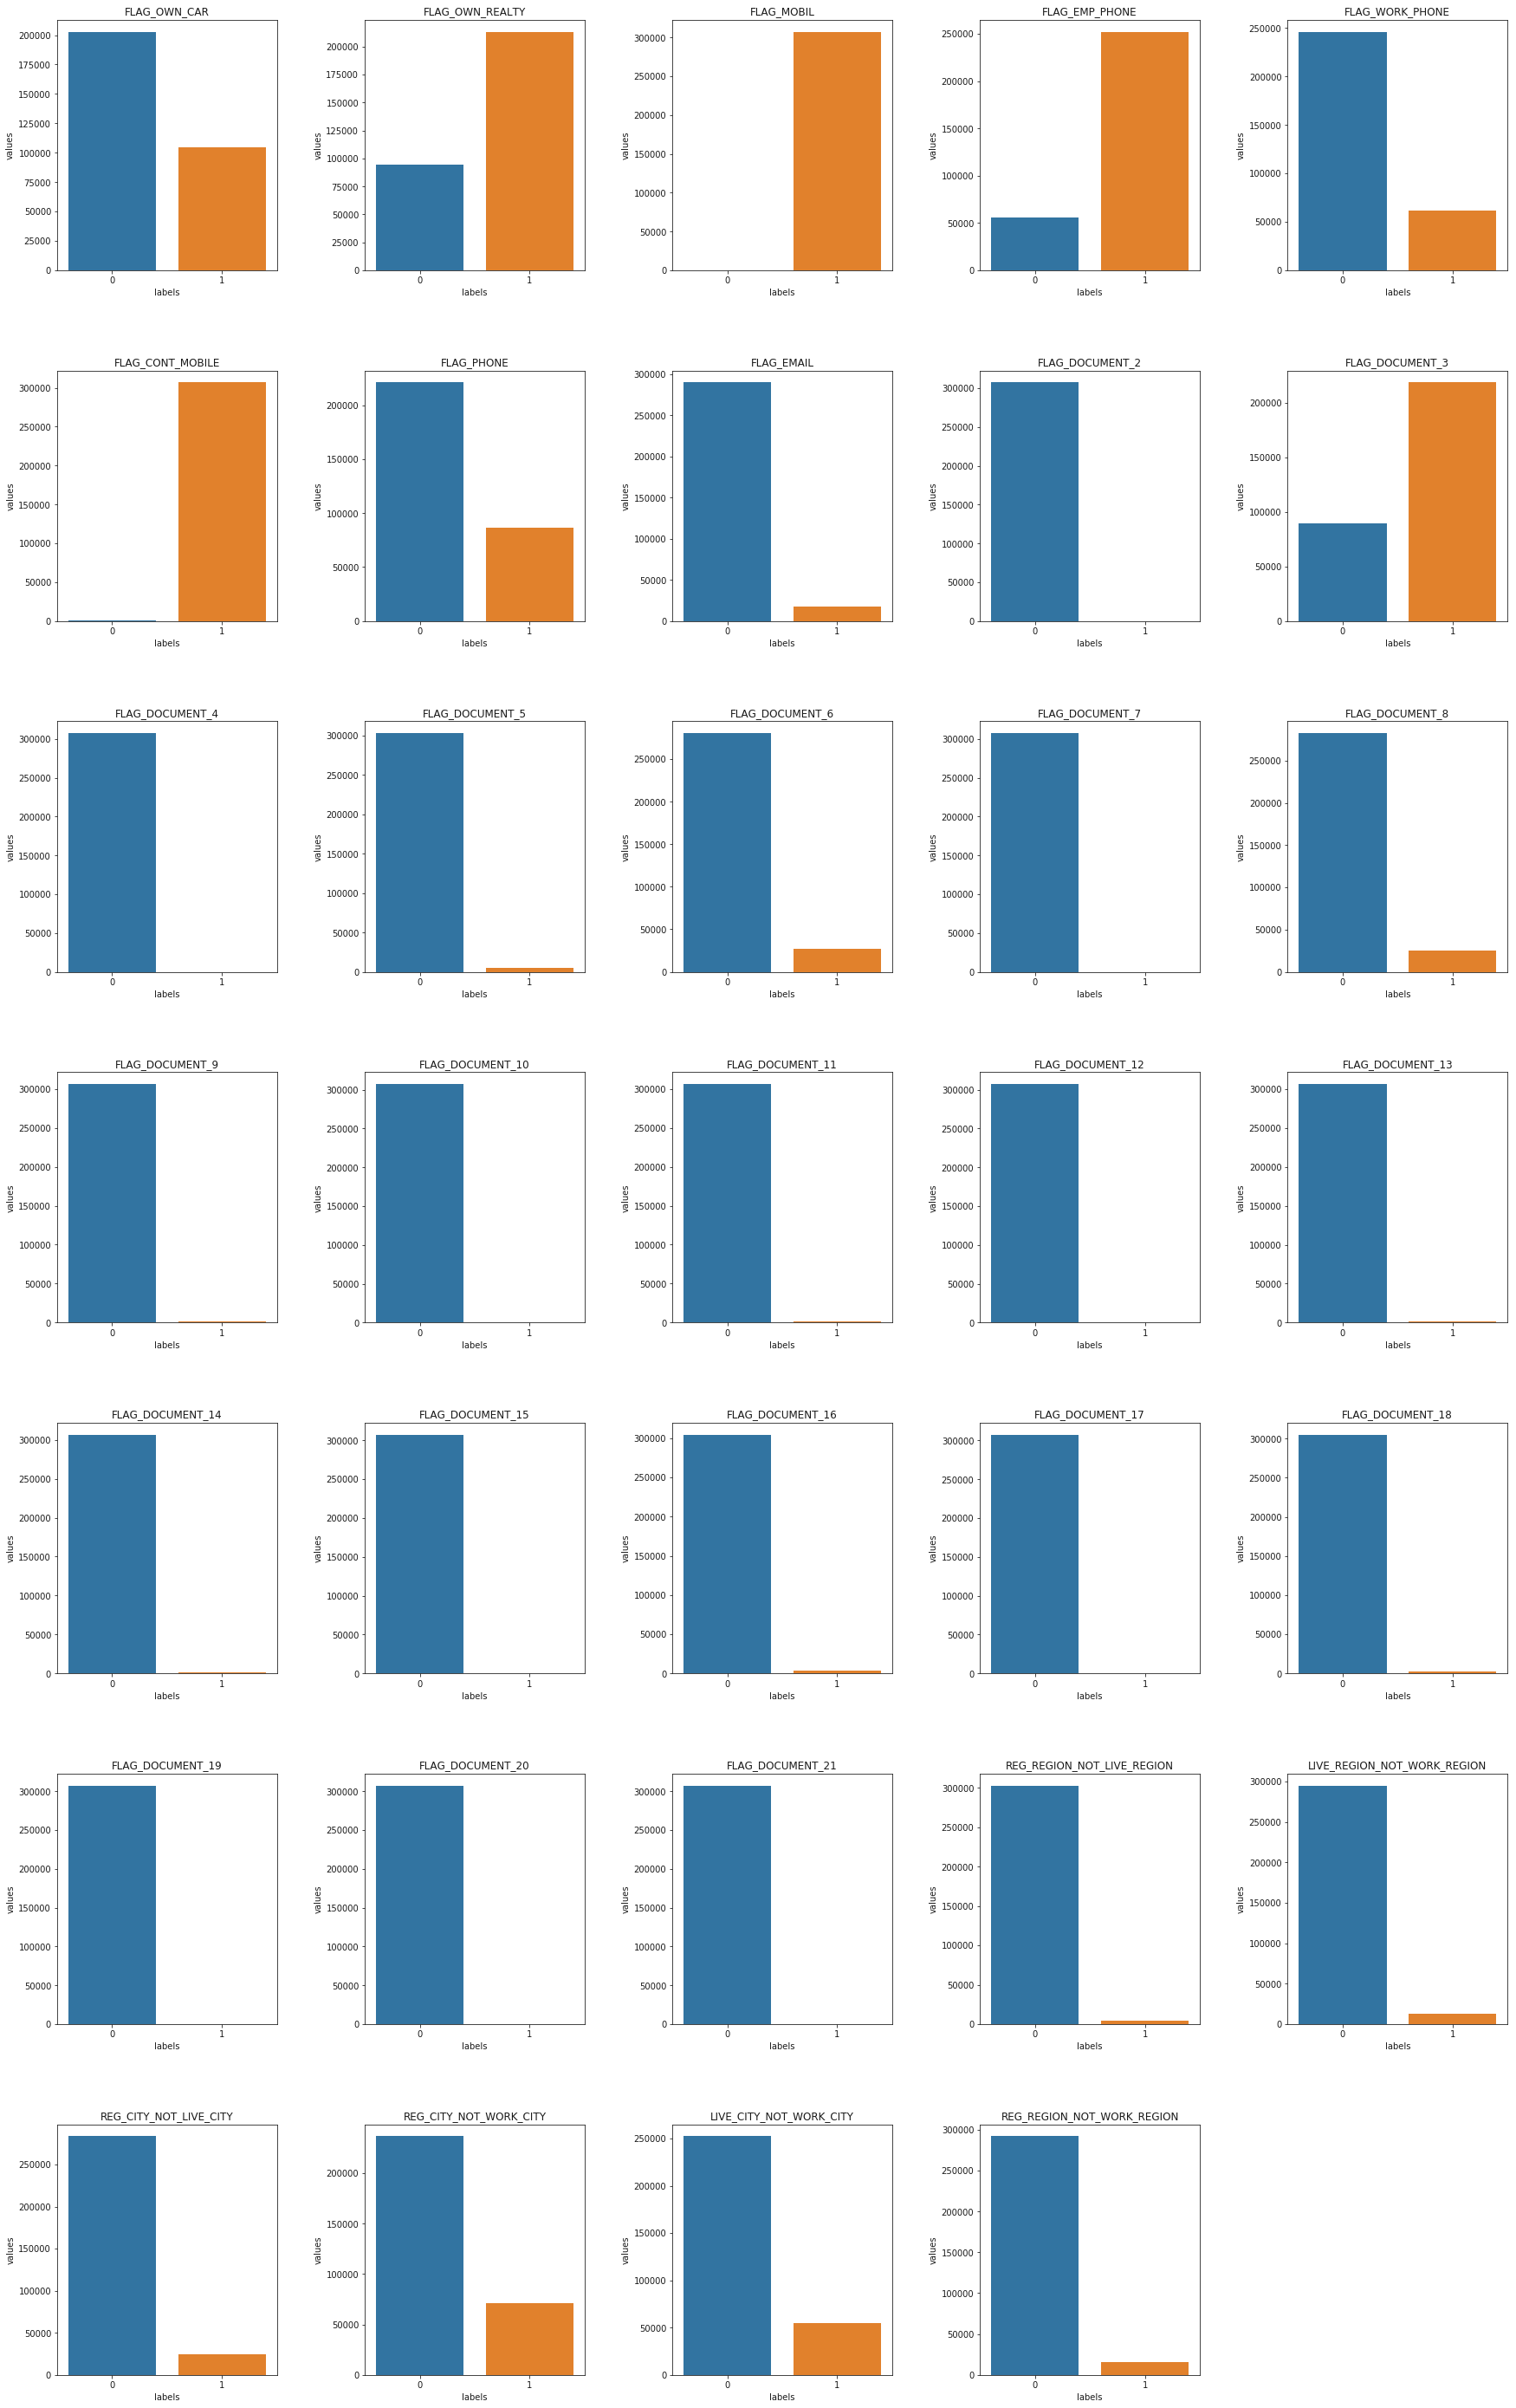

In [65]:
# Adjust size of the plot
fig = plt.figure(figsize=(30, 50))

# Adjust spacing between each subplot
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop through columns and plot histogram 
for i in bi_df.columns:
    j = bi_df.columns.get_loc(i)
    plt.subplot(7, 5, j+1)
    temp = bi_df[i].value_counts()
    df = pd.DataFrame({'labels': temp.index,
                       'values': temp.values
                      })
    plt.title(i)
    sns.set_color_codes("pastel")
    sns.barplot(x = 'labels', y="values", data=df)
    locs, labels = plt.xticks()

Aside from a few exceptions, there seem to be few loans that have any given document.  It would be interesting to see if adding a dummy aggreagate variable 'has_document' impacts the model at all.

Other things to consider:
* has_asset: Dummy variable to mark if has car OR real estate
* has_contact: Dummy variable to mark if has any means of contact
* has_work_contact / has_home_contact: whether the person has provided only a home or only a work contact method
* has_phone: whether there is any phone number provided, work or home

It would be interesting to see what the documents are.  


## Categorical Variables

These variables are either strings or numbers that do not represent any inherent value and cannot be calculated.

In [66]:
# Any variable begining with 'Name'
name_cols = [col for col in train if col.startswith('NAME')]

# Since these are cyclic, there is no definitive order and are treated as categorical
time_cols = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START']

# All other categorical variables
misc_cat_cols = ['CODE_GENDER', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 
                 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE']

# Put everything into one dataframe
cat_df = train[misc_cat_cols + name_cols + time_cols]

In [67]:
# View the unique data points, and determine which variables we need to replace
for col in cat_df.columns:
    print(col, cat_df[col].unique())

CODE_GENDER ['M' 'F' 'XNA']
OCCUPATION_TYPE ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
ORGANIZATION_TYPE ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport:

### Gender

It seems that nearly double the amount of females are taking out loans as their male counterparts.

Aside from distribution of males and females, we see that there are only 4 'XNA' observations, which intuitively means that the data is missing or faulty.  It can be imputed by mode or randomly replaced at the same frequency as the variable's ratio.

  labels  values
0      F  202448
1      M  105059
2    XNA       4


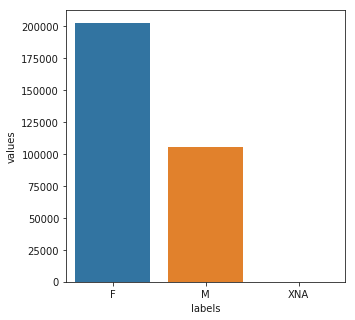

In [77]:
# Adjust size of the plot
fig = plt.figure(figsize=(5, 5))

temp = cat_df.CODE_GENDER.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
sns.barplot(x = 'labels', y="values", data=df)

print(df)

### OCCUPATION 

After a univariate analysis, it doesn't seem like there are any anomalies, but it could be interesting to see if clustering different professions into new features would improve the accuracy

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

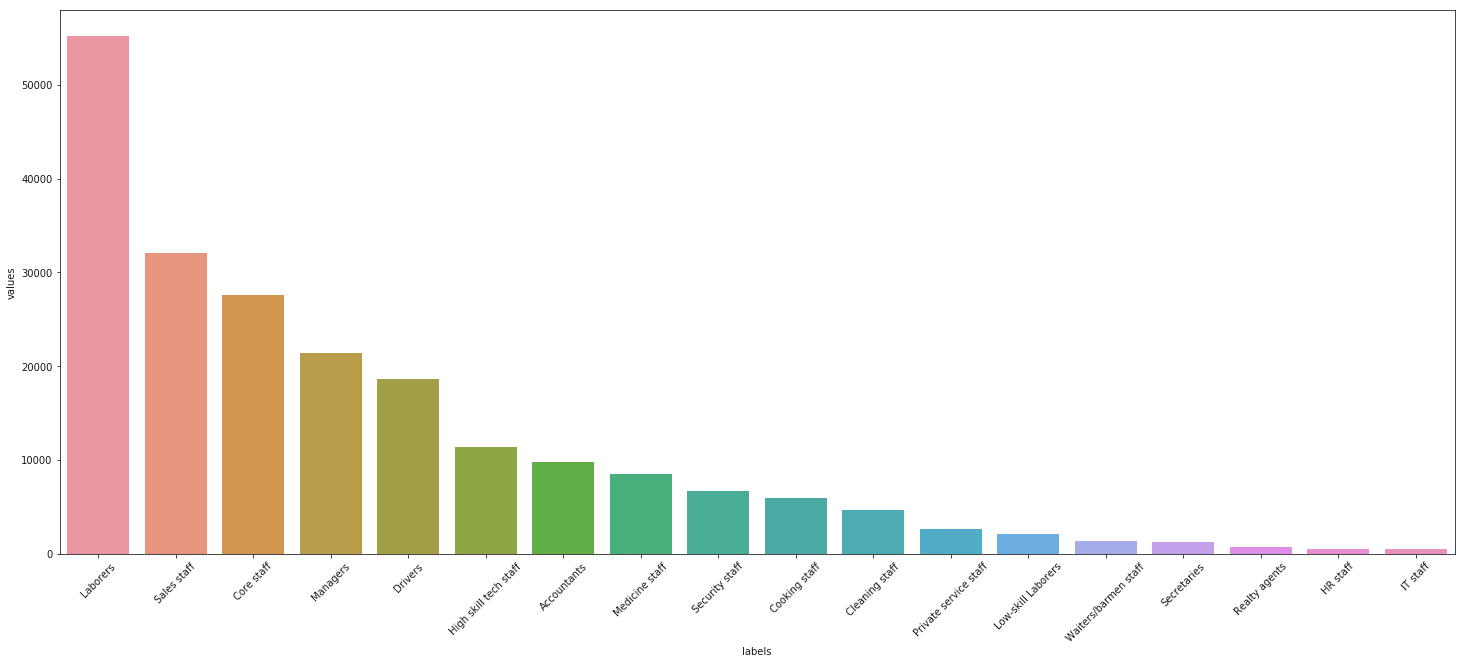

In [85]:
# Adjust size of the plot
fig = plt.figure(figsize=(25, 10))

temp = cat_df.OCCUPATION_TYPE.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
sns.barplot(x = 'labels', y="values", data=df)
plt.xticks(rotation = 45)

### ORGANIZATION

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]), <a list of 58 Text xticklabel objects>)

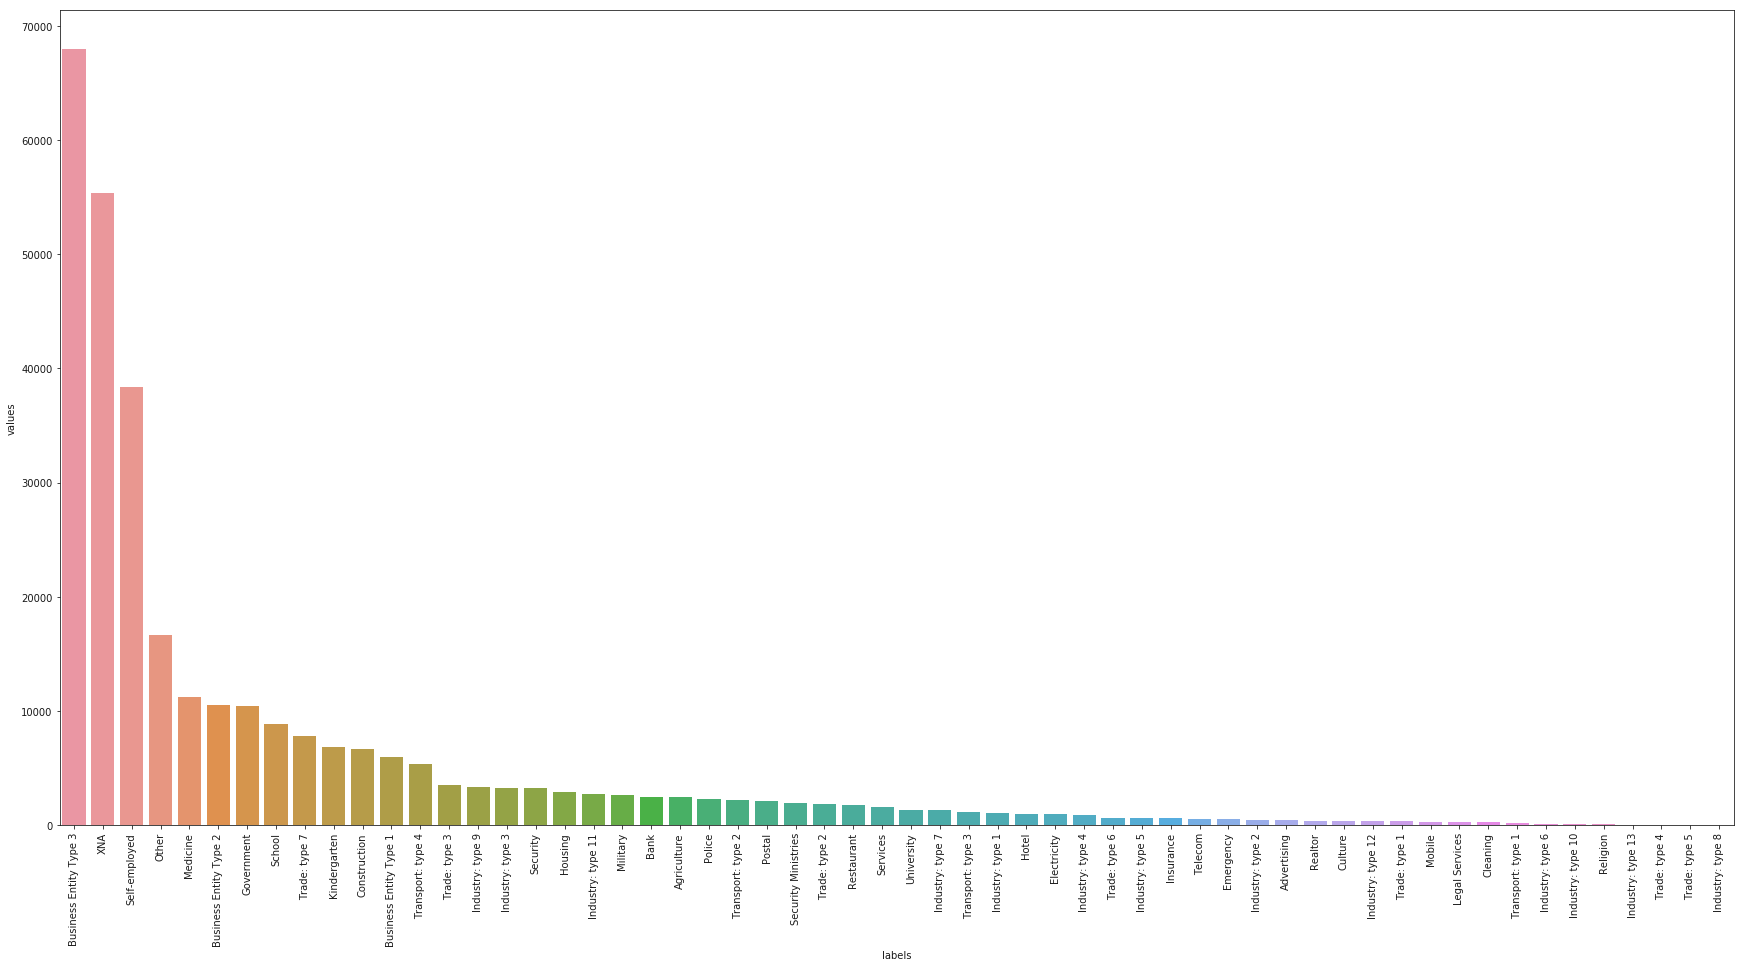

In [89]:
# Adjust size of the plot
fig = plt.figure(figsize=(30, 15))

temp = cat_df.ORGANIZATION_TYPE.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
sns.barplot(x = 'labels', y="values", data=df)
plt.xticks(rotation = 90)

There is a significant volume of 'XNA', which could mean that the individual is unemployed.  It could also mean that the data is faulty or the person just didn't fill out the form.  Because it is such a significant ratio of the data, we need to determine how to deal with the data.  Let's subset the XNA data and compare it to the income type.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

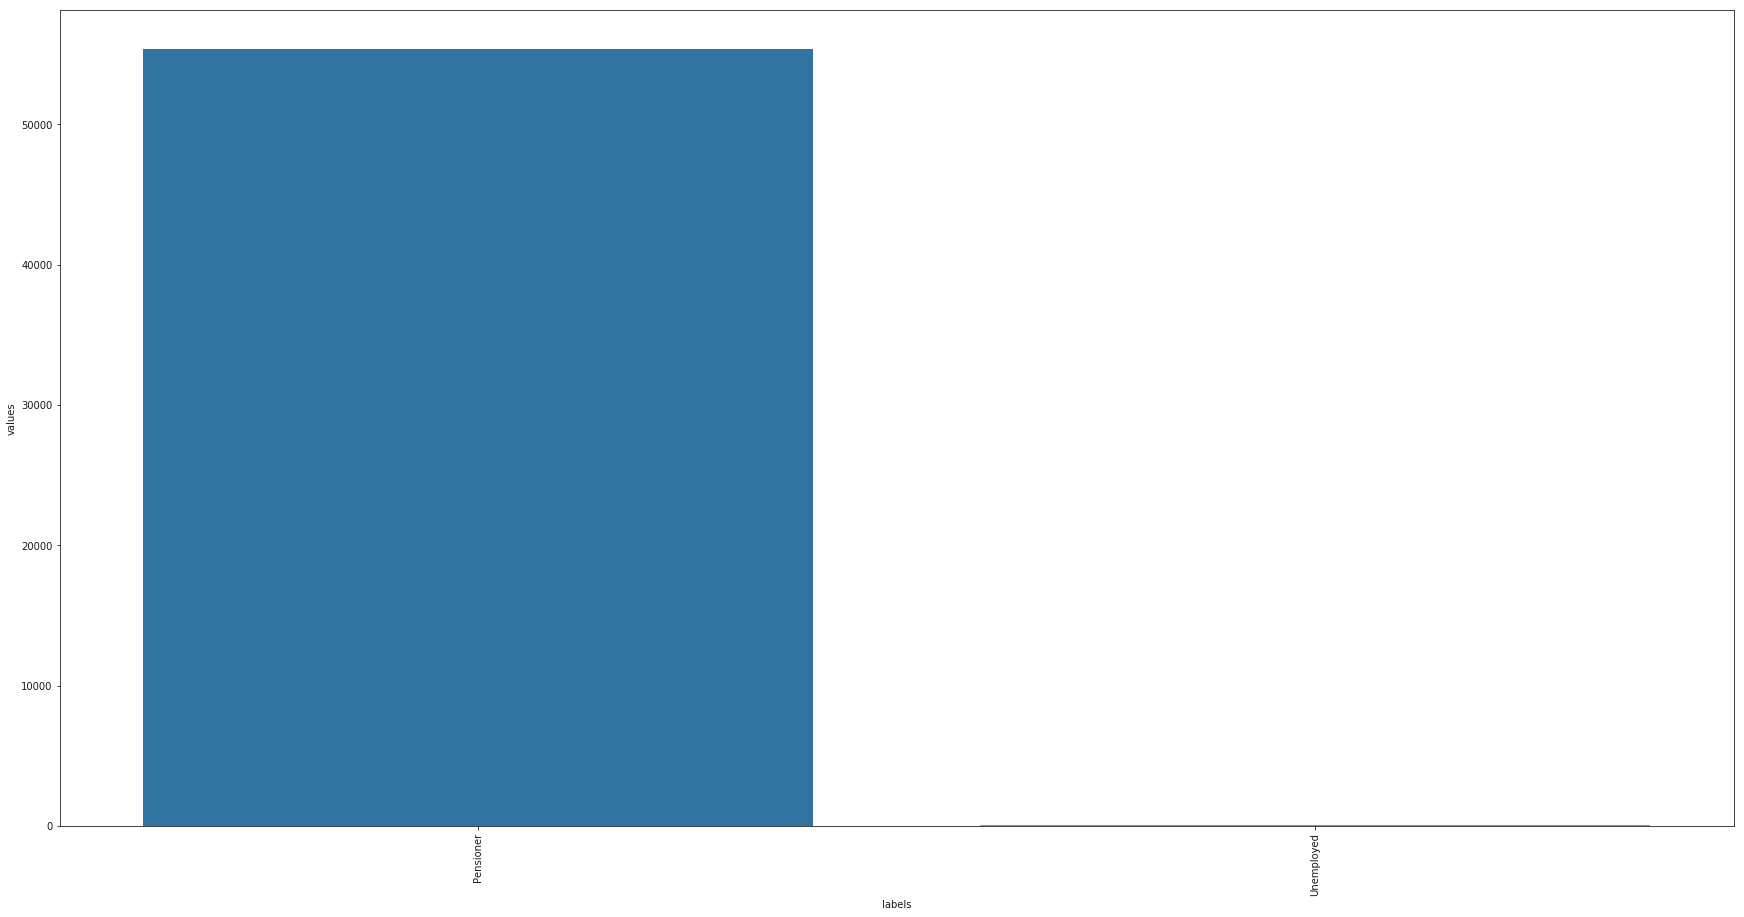

In [101]:
# Adjust size of the plot
fig = plt.figure(figsize=(30, 15))

temp = cat_df[cat_df.ORGANIZATION_TYPE == 'XNA']['NAME_INCOME_TYPE'].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
sns.barplot(x = 'labels', y="values", data=df)
plt.xticks(rotation = 90)

Turns out that the people who didn't fill out the organization type are either receiving pensions or are unemployed, so there is no employer data to fill out.  Therefore, we can rename XNA to UNEMPLOYED

### HOUSE TYPE

A high percentage of the data is 'Block of Flats'.  'Specific Housing' can refer to many things and is ambiguous.

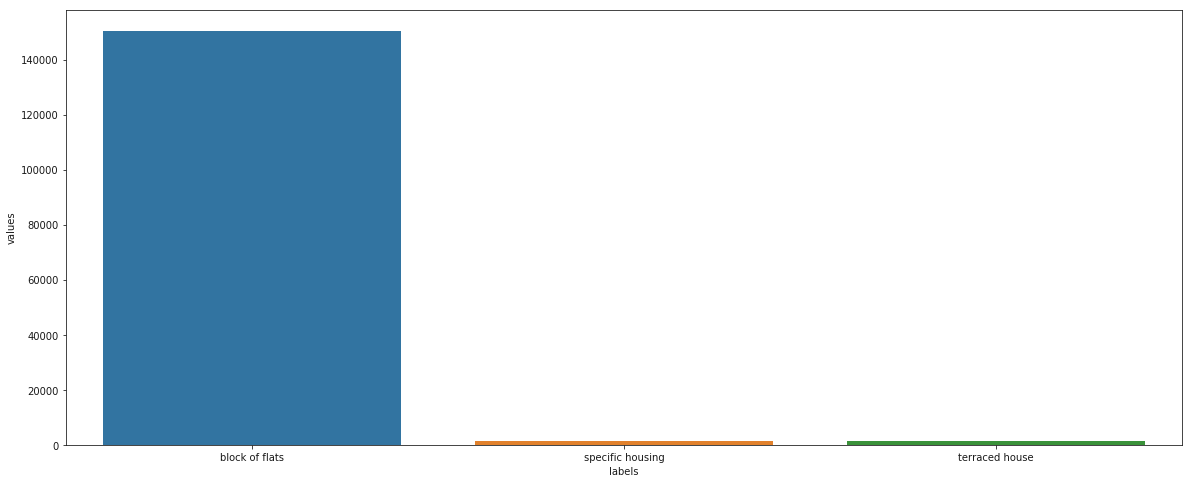

In [93]:
# Adjust size of the plot
fig = plt.figure(figsize=(20, 8))

temp = cat_df.HOUSETYPE_MODE.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
sns.barplot(x = 'labels', y="values", data=df)

### Living Situation

Most people applying for these loans own their own home/apartment.  It would be interesting to see if renting vs. owning vs. section 8 housing played any role.

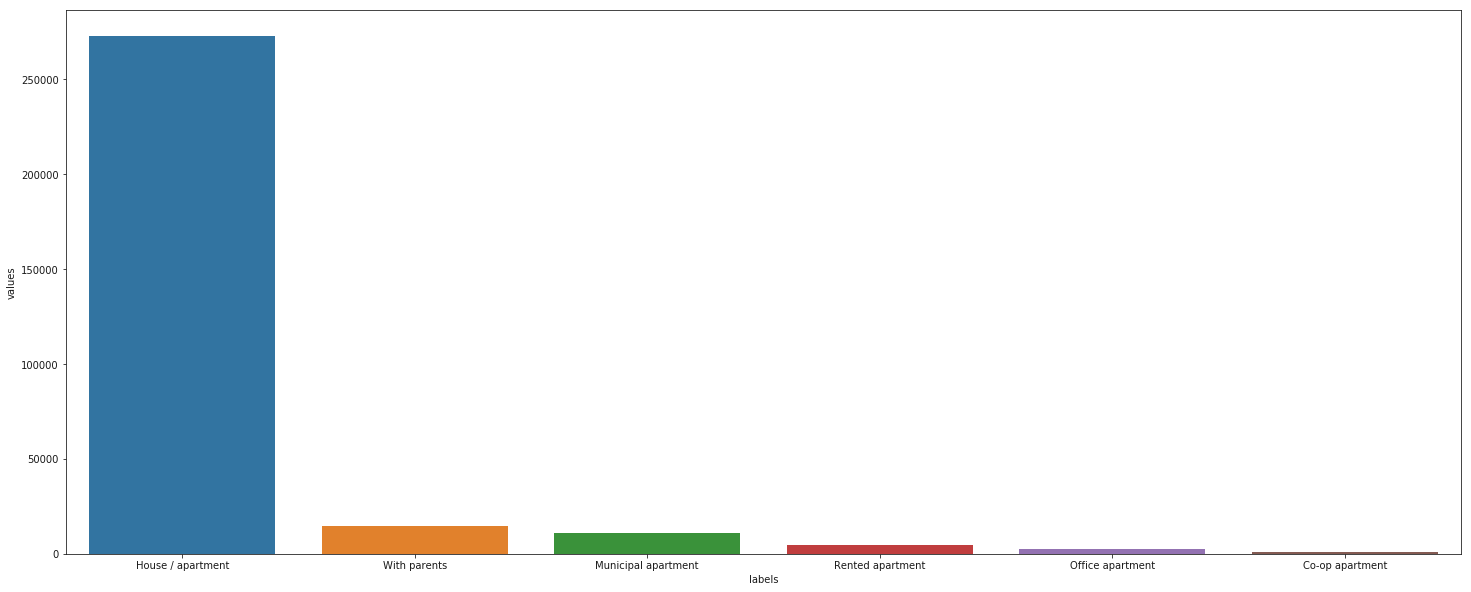

In [104]:
# Adjust size of the plot
fig = plt.figure(figsize=(25, 10))

temp = cat_df.NAME_HOUSING_TYPE.value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
sns.barplot(x = 'labels', y="values", data=df)

## Ordinal Variables

These are discrete variables whose order matter.  

In [34]:
# There are only two variables that are ordinal
rating_cols = ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']

# Put everything into one dataframe
ord_df = train[rating_cols]

In [42]:
# Make sure that these are actually binary variables, and determine which variables we need to replace
for col in ord_df.columns:
    print(col, ord_df[col].unique())

REGION_RATING_CLIENT_W_CITY [2 1 3]
REGION_RATING_CLIENT [2 1 3]


## Numeric Variables

In [44]:
# Anything that begins with 'AMT' represents a monetary value, aside from the AMT_REQ which is a time-based variable
amt_cols = [col for col in train if col.startswith('AMT') and not col.startswith('AMT_REQ')]

# Not sure what the social circle counts are, but assuming they are numerical for now 
cnt_cols = [col for col in train if 'CNT' in col]

# These variables are time-based.  Not sure what they mean, though.
credit_cols = [col for col in train if col.startswith('AMT_REQ_CREDIT_BUREAU')]

# These variables represent number of days since 'X'
days_cols = [col for col in train if col.startswith('DAYS')]

# Additional numeric variables.  External sources represent normalized credit indecise obtained from alternate sources
misc_num_cols = ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'REGION_POPULATION_RELATIVE']

# Summary variables, removing some variables that have 'MODE' but are really categorical
summary_cols = [col for col in train if col not in misc_cat_cols and 'MODE' in col or 'MEDI' in col or 'AVG' in col]

# Put everything into one dataframe
num_df = train[amt_cols + cnt_cols + misc_num_cols + days_cols + credit_cols + summary_cols]

In [45]:
# Make sure that these are actually binary variables, and determine which variables we need to replace
for col in num_df.columns:
    print(col, num_df[col].unique())

AMT_INCOME_TOTAL [ 202500.   270000.    67500.  ...,   96768.   546250.5  113062.5]
AMT_CREDIT [  406597.5  1293502.5   135000.  ...,   181989.    743863.5  1391130. ]
AMT_ANNUITY [ 24700.5  35698.5   6750.  ...,  71986.5  58770.   77809.5]
AMT_GOODS_PRICE [  351000.   1129500.    135000.  ...,   453465.    143977.5   743863.5]
CNT_CHILDREN [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
CNT_FAM_MEMBERS [  1.   2.   3.   4.   5.   6.   9.   7.   8.  10.  13.  nan  14.  12.  20.
  15.  16.  11.]
OBS_30_CNT_SOCIAL_CIRCLE [   2.    1.    0.    4.    8.   10.   nan    7.    3.    6.    5.   12.
    9.   13.   11.   14.   22.   16.   15.   17.   20.   25.   19.   18.
   21.   24.   23.   28.   26.   29.   27.   47.  348.   30.]
DEF_30_CNT_SOCIAL_CIRCLE [  2.   0.   1.  nan   3.   4.   5.   6.   7.  34.   8.]
OBS_60_CNT_SOCIAL_CIRCLE [   2.    1.    0.    4.    8.   10.   nan    7.    3.    6.    5.   12.
    9.   13.   11.   14.   21.   15.   22.   16.   20.   25.   17.   19.
   18.   24.   

AMT_REQ_CREDIT_BUREAU_HOUR [  0.  nan   1.   2.   3.   4.]
AMT_REQ_CREDIT_BUREAU_DAY [  0.  nan   1.   3.   2.   4.   5.   6.   9.   8.]
AMT_REQ_CREDIT_BUREAU_WEEK [  0.  nan   1.   3.   2.   4.   5.   6.   8.   7.]
AMT_REQ_CREDIT_BUREAU_MON [  0.  nan   1.   2.   6.   5.   3.   7.   9.   4.  11.   8.  16.  12.  14.
  10.  13.  17.  24.  19.  15.  23.  18.  27.  22.]
AMT_REQ_CREDIT_BUREAU_QRT [   0.   nan    1.    2.    4.    3.    8.    5.    6.    7.  261.   19.]
AMT_REQ_CREDIT_BUREAU_YEAR [  1.   0.  nan   2.   4.   5.   3.   8.   6.   9.   7.  10.  11.  13.  16.
  12.  25.  23.  15.  14.  22.  17.  19.  18.  21.  20.]
APARTMENTS_AVG [ 0.0247  0.0959     nan ...,  0.0261  0.0731  0.3466]
BASEMENTAREA_AVG [ 0.0369  0.0529     nan ...,  0.274   0.2733  0.636 ]
YEARS_BEGINEXPLUATATION_AVG [ 0.9722  0.9851     nan  0.9811  0.9806  0.9985  0.9881  0.9781  0.9786
  0.9876  0.9861  0.9732  0.9831  0.9697  0.9901  0.9801  0.9762  0.996
  0.998   0.9846  0.9886  0.9354  0.9841  0.9856  0.995

LIVINGAPARTMENTS_AVG [ 0.0202  0.0773     nan ...,  0.2334  0.0111  0.1543]
LIVINGAREA_AVG [ 0.019   0.0549     nan ...,  0.4256  0.6005  0.9279]
NONLIVINGAPARTMENTS_AVG [  0.00000000e+00   3.90000000e-03              nan   1.93000000e-02
   7.70000000e-03   1.90000000e-03   6.56000000e-02   5.80000000e-03
   2.78000000e-01   2.32000000e-02   7.72000000e-02   1.93100000e-01
   3.86000000e-02   1.54000000e-02   2.20100000e-01   1.16000000e-02
   2.70000000e-02   1.62200000e-01   3.09000000e-02   4.25000000e-02
   6.18000000e-02   5.02000000e-02   1.74000000e-02   2.90000000e-02
   2.10000000e-03   1.30000000e-03   6.90000000e-03   1.35000000e-02
   4.10000000e-03   1.50000000e-03   1.27400000e-01   5.79000000e-02
   2.62500000e-01   8.00000000e-04   1.96900000e-01   4.83000000e-02
   4.63000000e-02   4.44000000e-02   1.03000000e-02   5.66000000e-02
   2.83000000e-02   1.15800000e-01   3.47000000e-02   8.11000000e-02
   7.34000000e-02   7.45200000e-01   1.23600000e-01   2.50000000e-03
  

YEARS_BUILD_MEDI [  6.24300000e-01   7.98700000e-01              nan   7.38300000e-01
   9.79900000e-01   8.39000000e-01   7.04800000e-01   7.11500000e-01
   8.32300000e-01   8.12100000e-01   7.71900000e-01   6.78000000e-01
   9.46300000e-01   7.45100000e-01   7.92000000e-01   7.31600000e-01
   8.45700000e-01   0.00000000e+00   7.85300000e-01   8.05400000e-01
   5.63900000e-01   8.52400000e-01   6.64500000e-01   7.65200000e-01
   6.31000000e-01   9.66500000e-01   9.86600000e-01   6.37700000e-01
   9.73200000e-01   8.18900000e-01   6.71300000e-01   7.18200000e-01
   7.58500000e-01   5.70600000e-01   9.26200000e-01   6.91400000e-01
   6.57800000e-01   6.98100000e-01   6.51100000e-01   8.59100000e-01
   5.84000000e-01   7.51800000e-01   9.93300000e-01   8.25600000e-01
   8.72500000e-01   5.97500000e-01   8.85900000e-01   6.10900000e-01
   9.06100000e-01   5.43800000e-01   8.65800000e-01   6.44400000e-01
   8.79200000e-01   9.32900000e-01   7.78600000e-01   4.70000000e-01
   3.29100000e-01